# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: UNSW-NB15 Dataset

ganti dataset yang ini ya...

# **Tolong di running sendiri ya, kalau ada error tanyakan dahalu melalui chatgpt ya**

# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

In [2]:
data = pd.read_csv('./Android_Ransomeware.csv')

Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [3]:
data.head(n=5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
print(data['Label'].value_counts())

Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [5]:
# Hitung distribusi label
label_counts = data['Label'].value_counts()
print(label_counts)

Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [6]:
data.shape

(392034, 86)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

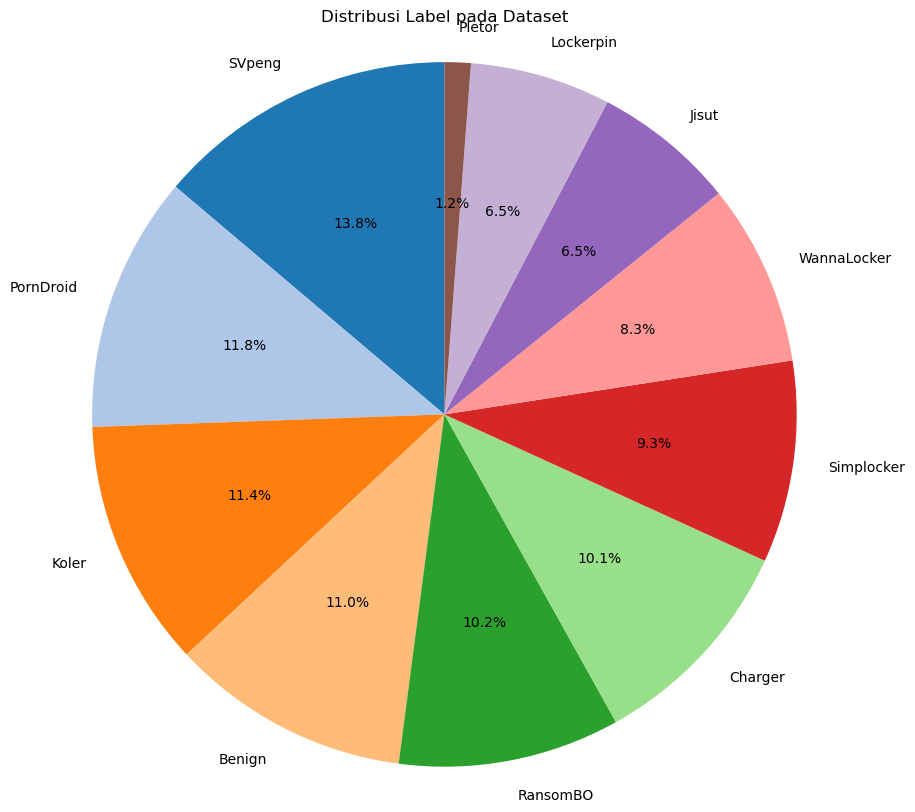

In [7]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors  # Menggunakan palet warna yang bervariasi
)
plt.title('Distribusi Label pada Dataset')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()


In [8]:
# Melihat nilai unik dari kolom Label
unique_labels = data['Label'].unique()
print("Nilai Unik dalam Label:", unique_labels)

Nilai Unik dalam Label: ['Benign' 'Charger' 'Jisut' 'Koler' 'Lockerpin' 'Pletor' 'PornDroid'
 'RansomBO' 'Simplocker' 'SVpeng' 'WannaLocker']


In [9]:
# Menghitung jumlah setiap kelas dalam Label
label_counts = data['Label'].value_counts()

print("Distribusi Kelas")
print(label_counts)

Distribusi Kelas
Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


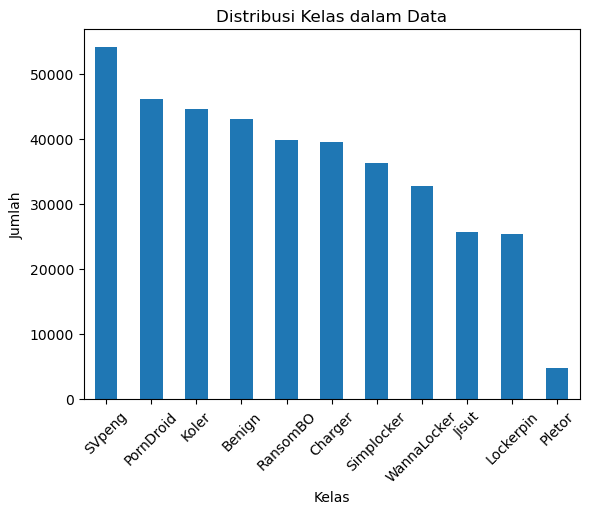

In [10]:
import matplotlib.pyplot as plt

# Membuat diagram batang untuk distribusi kelas
label_counts.plot(kind='bar')
plt.title('Distribusi Kelas dalam Data')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


# **Label Encoding**

In [11]:
# Misalkan Anda sudah memuat data ke dalam DataFrame bernama `data`
# Menghapus spasi dari nama kolom
data.columns = data.columns.str.strip()

# Cek kolom untuk memastikan tidak ada spasi
print(data.columns)

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [12]:
import pandas as pd

# drop unnamed
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Siapkan fitur (X) dan target (y)
X = data.drop(['Label', 'Flow ID', 'Source IP', 'Destination IP'], axis=1)  # Menghapus kolom yang tidak diperlukan
y = data['Label']  # Menggunakan kolom 'Label' secara langsung

# Tampilkan beberapa informasi untuk memastikan semuanya benar
print("Fitur (X):")
print(X.head())
print()
print("Label (y):")
print(y.value_counts())  # Menampilkan distribusi label

Fitur (X):
   Source Port  Destination Port  Protocol            Timestamp  \
0        51023               443         6  16/06/2017 03:55:47   
1        51023               443         6  16/06/2017 03:55:47   
2        34259               443         6  16/06/2017 03:55:52   
3        55509               443         6  16/06/2017 03:55:53   
4        44852               443         6  16/06/2017 03:55:58   

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         151054                  6                       8   
1            349                  2                       0   
2            119                  2                       0   
3          37055                  1                       1   
4         178727                  6                       7   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                       1076.0                       4575.0   
1                         23.0                          0.0   
2                 

In [13]:
# Assuming 'data' is your original DataFrame
# and you want to create 'bin_data' from it

# 1. Import necessary libraries (if not already imported)
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# 2. Create bin_data
# Assuming 'Label' is the column you want to binarize
lb = LabelBinarizer()  # Create a LabelBinarizer object
bin_data = data.copy()
bin_data['Label'] = bin_data["Label"].map(lambda x:'normal' if x == 'Benign' else 'abnormal')
bin_data['Label'] = lb.fit_transform(bin_data['Label'])

# reduce data
bin_data = bin_data.sample(frac=0.2, random_state=1)  # random_state is for reproducibility

# Now you can proceed with the rest of your code
X_bin = bin_data.drop(columns=['Label'], axis=1)
y_bin = bin_data['Label']

# **DATA SPLITTING**

In [14]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [15]:
X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [16]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/huggingface_hub-0.26.2-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


# **1. TRANSFORMER "ENCODER"**

# **CLASSIFICATION Non-Tuning**

ini dirunning sendiri ya

Fold 1
Accuracy for fold 1: 89.29%
F1 Score for fold 1: 0.8423


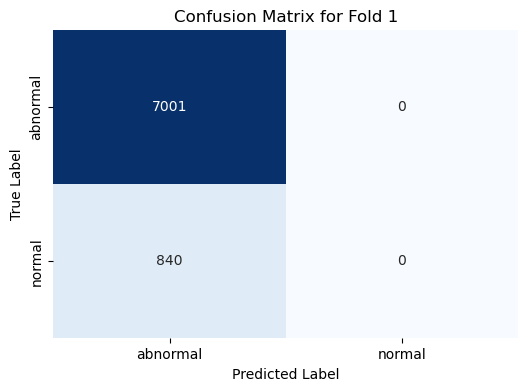

Fold 2
Accuracy for fold 2: 89.25%
F1 Score for fold 2: 0.8418


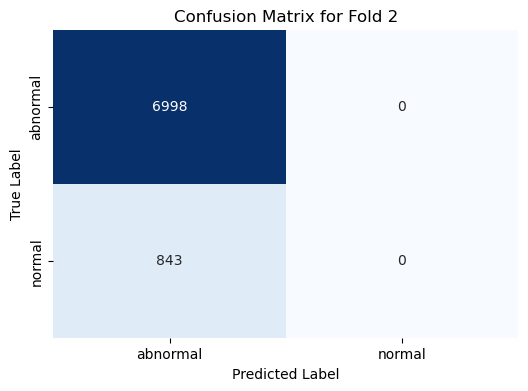

Fold 3
Accuracy for fold 3: 88.67%
F1 Score for fold 3: 0.8335


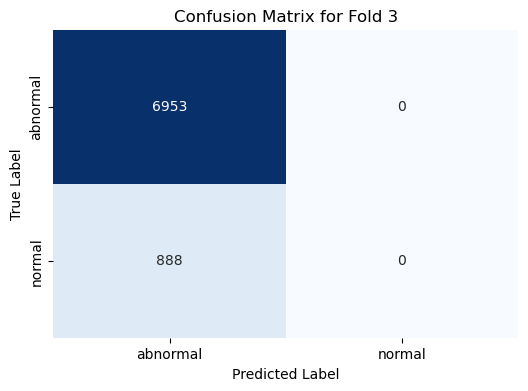

Fold 4
Accuracy for fold 4: 89.08%
F1 Score for fold 4: 0.8394


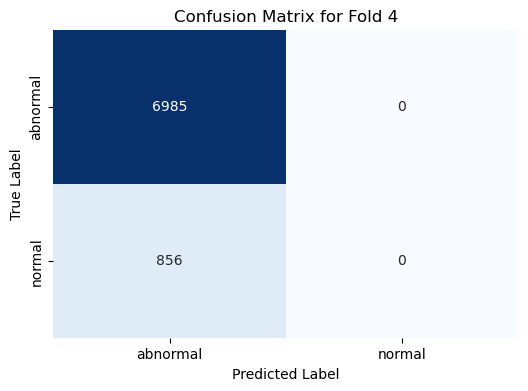

Fold 5
Accuracy for fold 5: 88.61%
F1 Score for fold 5: 0.8326


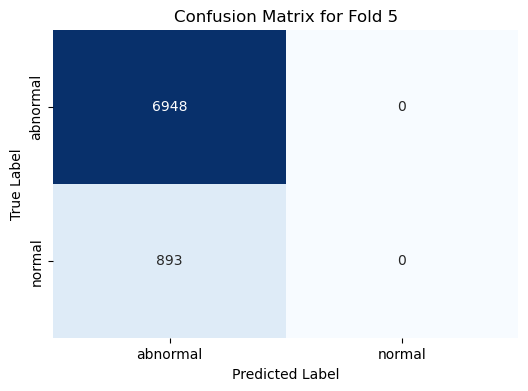

Fold 6
Accuracy for fold 6: 88.69%
F1 Score for fold 6: 0.8337


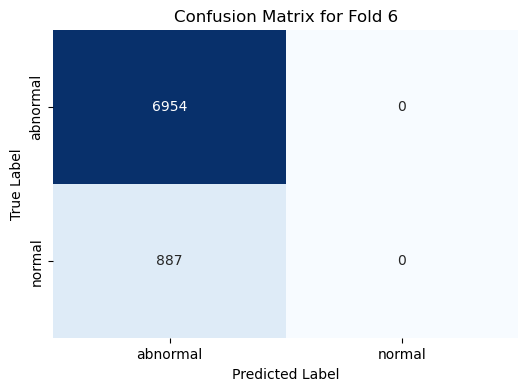

Fold 7
Accuracy for fold 7: 88.88%
F1 Score for fold 7: 0.8365


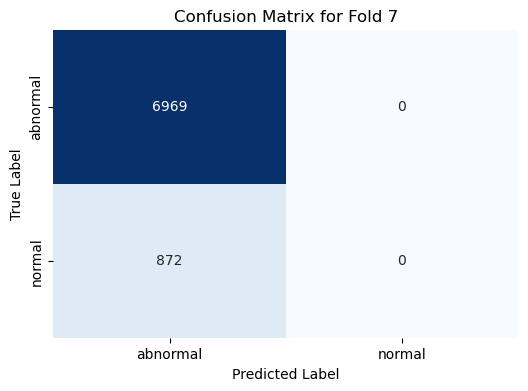

Fold 8
Accuracy for fold 8: 89.17%
F1 Score for fold 8: 0.8407


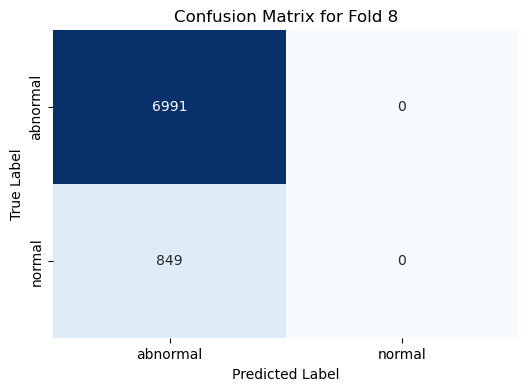

Fold 9
Accuracy for fold 9: 89.20%
F1 Score for fold 9: 0.8410


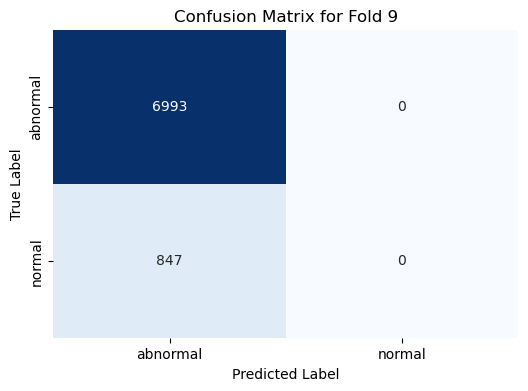

Fold 10
Accuracy for fold 10: 89.29%
F1 Score for fold 10: 0.8423


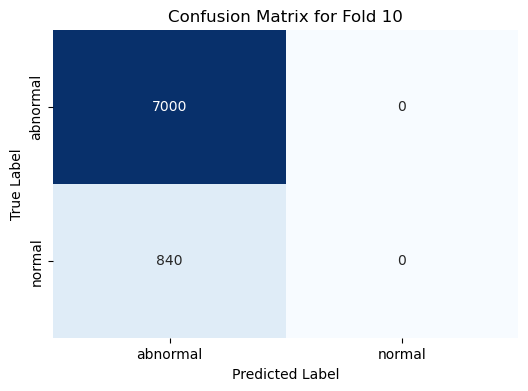

Average Accuracy: 89.01%
Average F1 Score: 0.8384


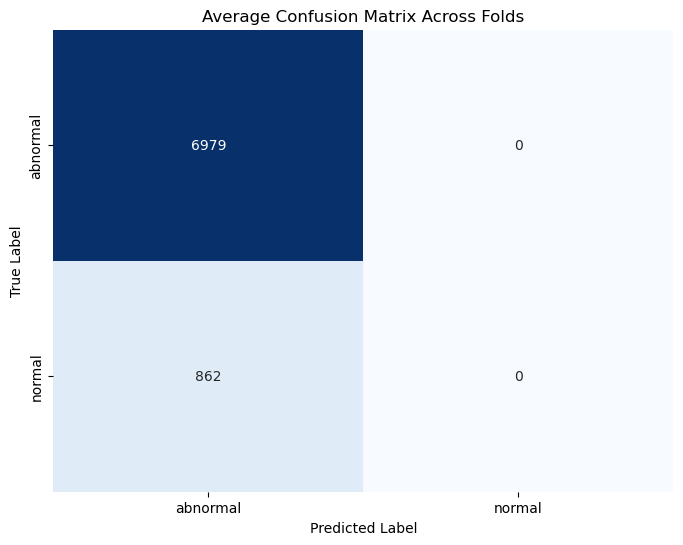

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.29%, F1 Score = 0.8423
Fold 2: Akurasi = 89.25%, F1 Score = 0.8418
Fold 3: Akurasi = 88.67%, F1 Score = 0.8335
Fold 4: Akurasi = 89.08%, F1 Score = 0.8394
Fold 5: Akurasi = 88.61%, F1 Score = 0.8326
Fold 6: Akurasi = 88.69%, F1 Score = 0.8337
Fold 7: Akurasi = 88.88%, F1 Score = 0.8365
Fold 8: Akurasi = 89.17%, F1 Score = 0.8407
Fold 9: Akurasi = 89.20%, F1 Score = 0.8410
Fold 10: Akurasi = 89.29%, F1 Score = 0.8423


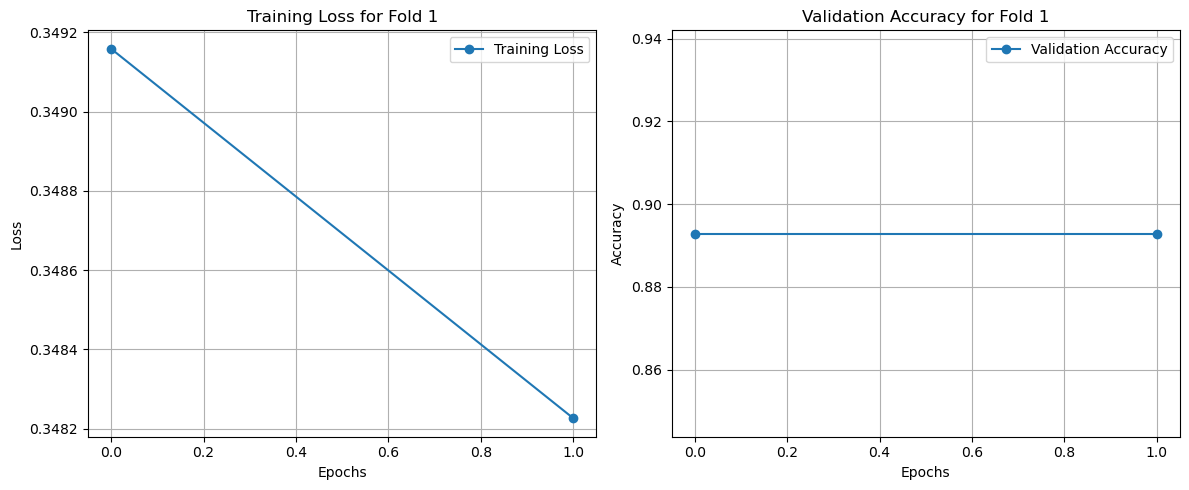

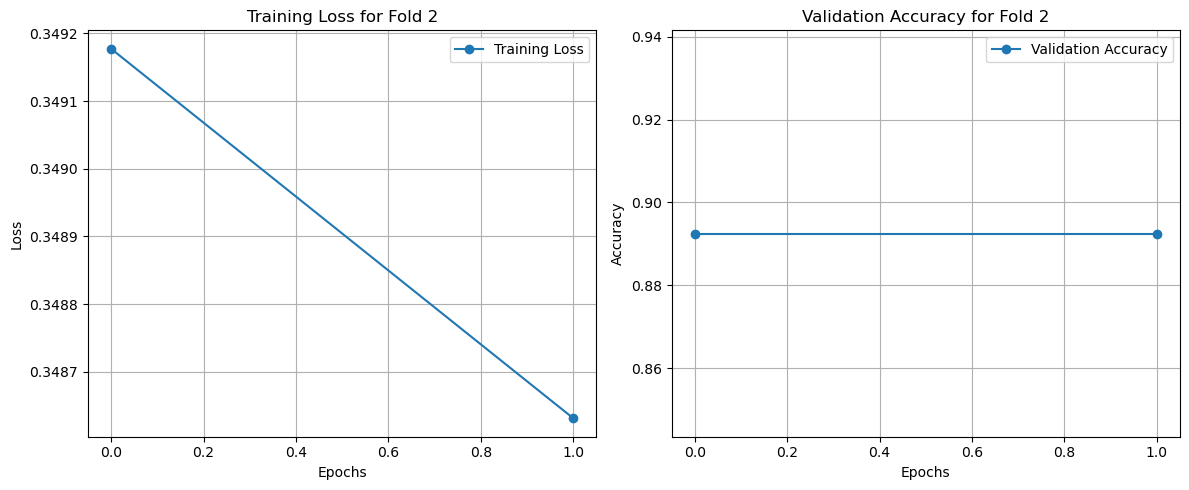

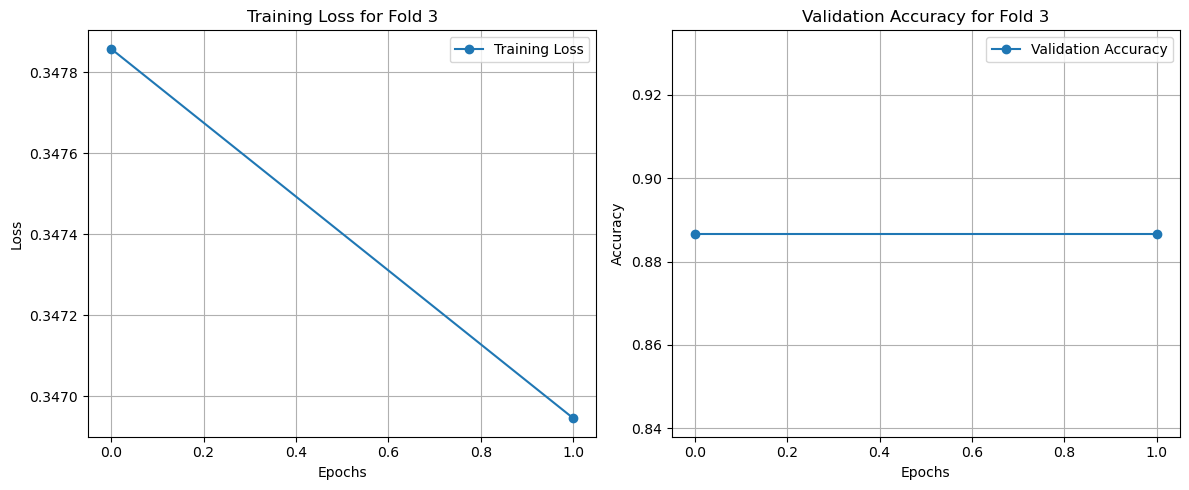

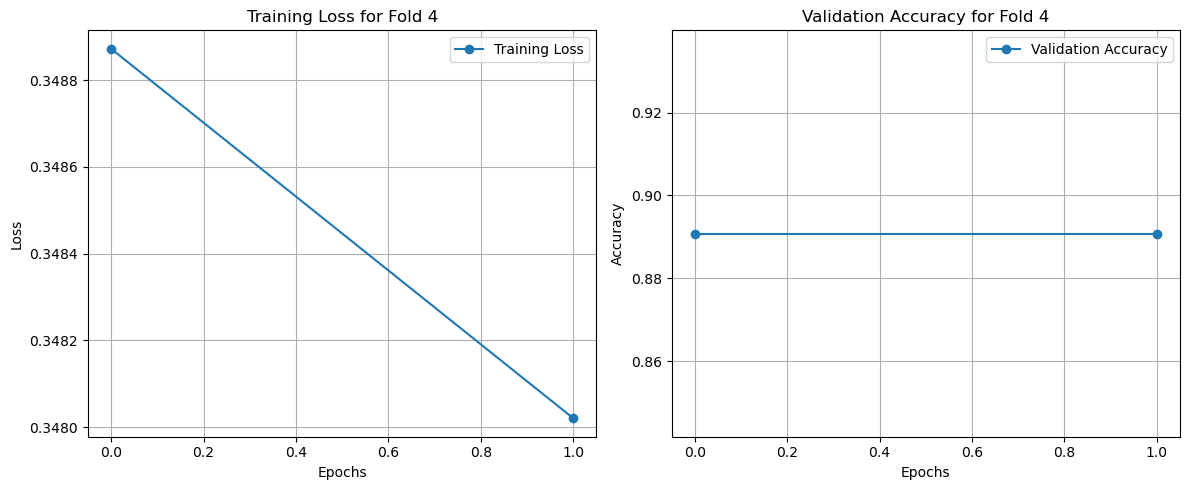

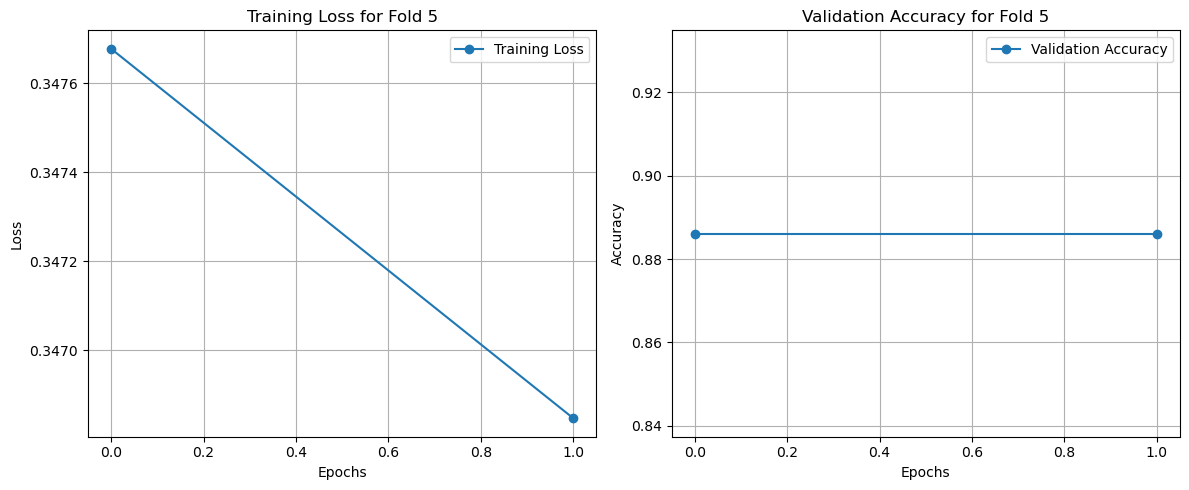

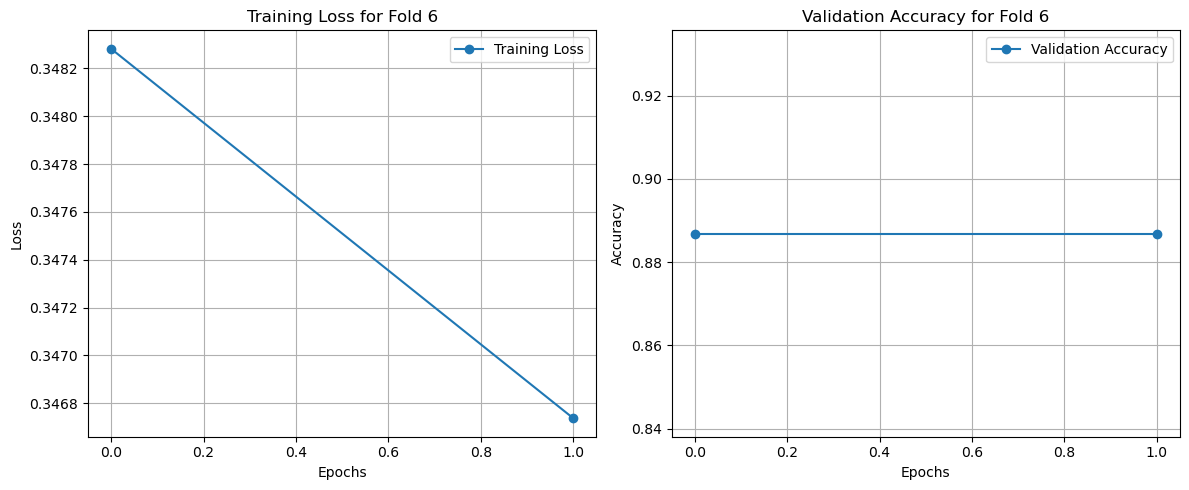

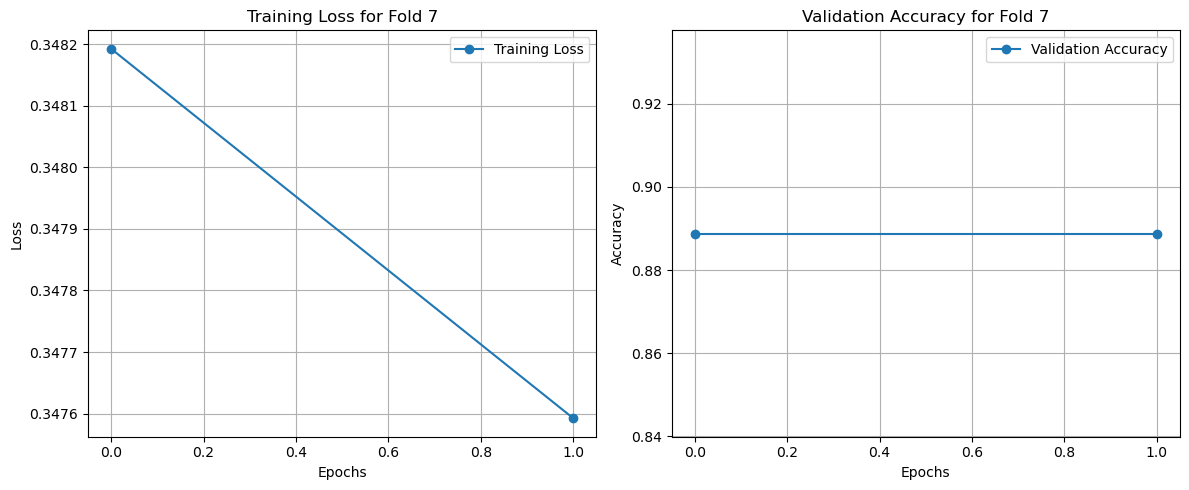

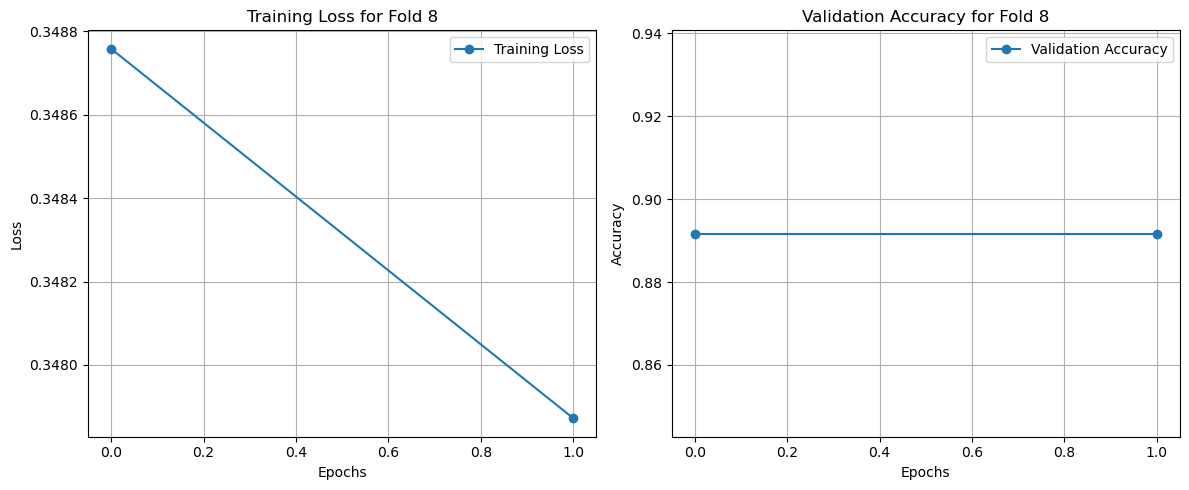

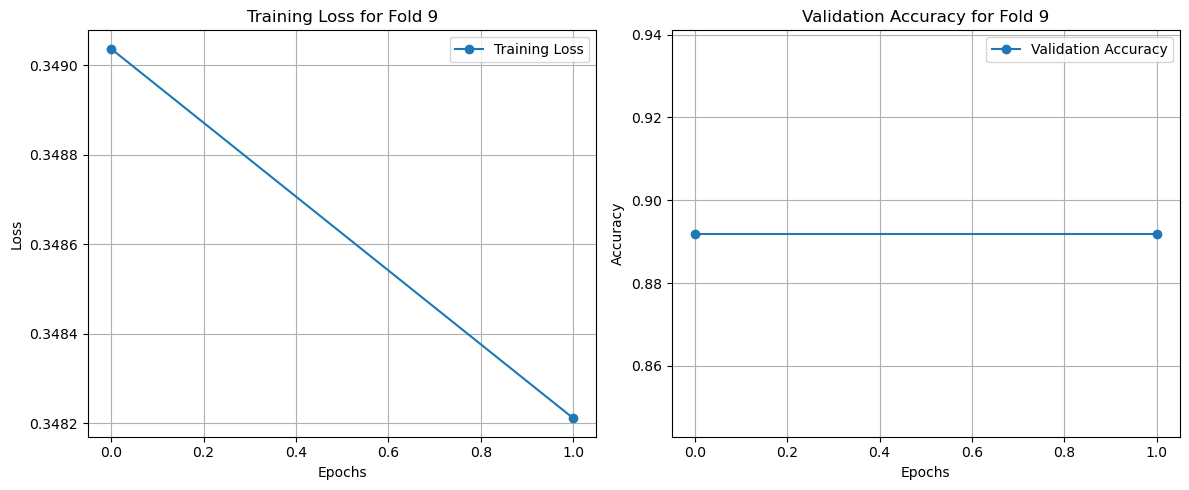

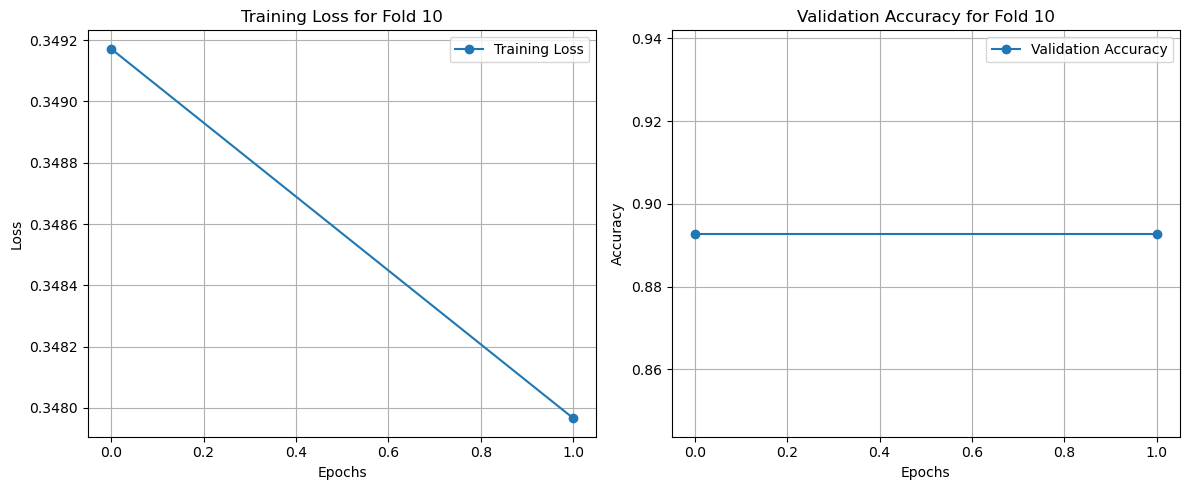

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = lb.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')

#     cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
#     print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


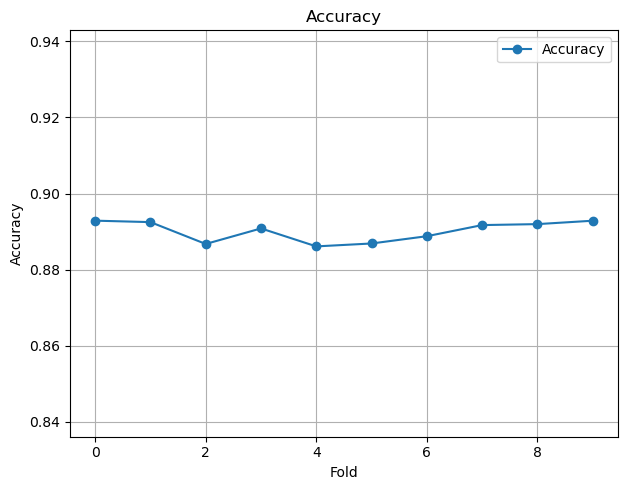

In [25]:
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 2)
plt.plot(all_accuracy, label='Accuracy', marker='o')
plt.title(f'Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(min(all_accuracy)-0.05, max(all_accuracy)+0.05)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning**

In [26]:
import itertools

# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)


    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3) # Keep d_model consistent

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    epoch_count = 2
    for epoch in range(epoch_count):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

"""
Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 33.24%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 32.57%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 46.89%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 35.61%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 48.09%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 45.35%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 48.32%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 47.08%
Best Params: {'lr': 0.0005, 'batch_size': 32, 'nhead': 2} with Accuracy: 48.32%
"""

Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 89.29%
Best Params: {'lr': 0.001, 'batch_size': 16, 'nhead': 2} with Accuracy: 89.29%


# **CLASSIFICATION With Hyperparameter Tuning**

Classification with best parameter: {'lr': 0.001, 'batch_size': 16, 'nhead': 2}
Fold 1
Accuracy for fold 1: 89.29%
F1 Score for fold 1: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7001
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


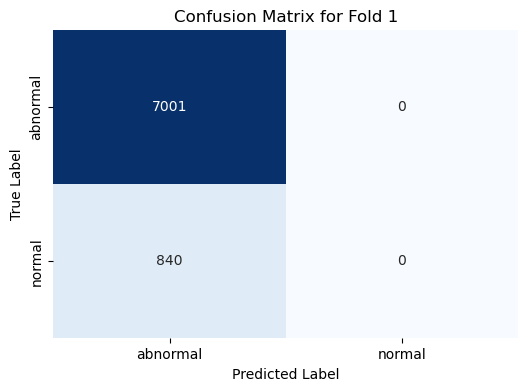

Fold 2
Accuracy for fold 2: 89.25%
F1 Score for fold 2: 0.8418
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6998
      normal       0.00      0.00      0.00       843

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


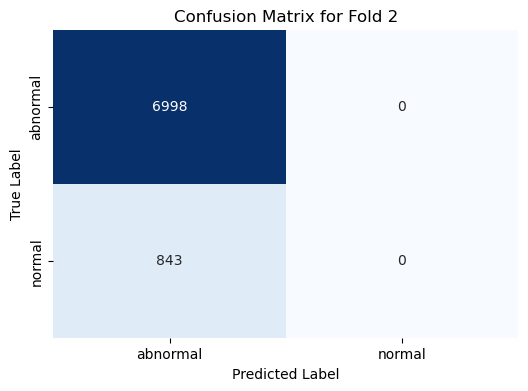

Fold 3
Accuracy for fold 3: 88.67%
F1 Score for fold 3: 0.8335
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6953
      normal       0.00      0.00      0.00       888

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


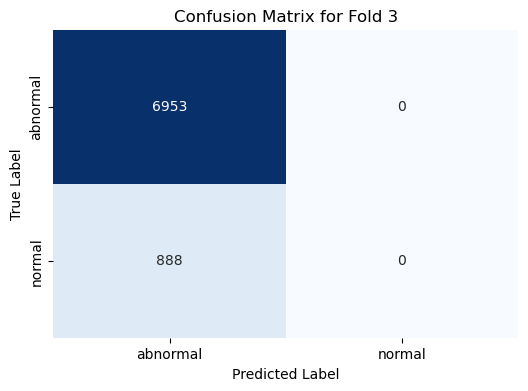

Fold 4
Accuracy for fold 4: 89.08%
F1 Score for fold 4: 0.8394
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6985
      normal       0.00      0.00      0.00       856

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


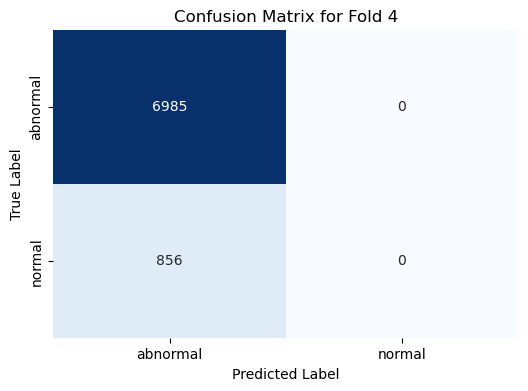

Fold 5
Accuracy for fold 5: 88.61%
F1 Score for fold 5: 0.8326
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6948
      normal       0.00      0.00      0.00       893

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


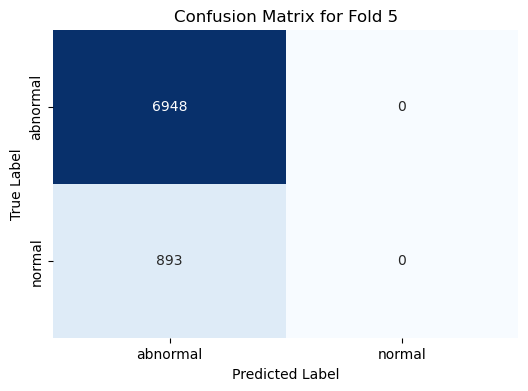

Fold 6
Accuracy for fold 6: 88.69%
F1 Score for fold 6: 0.8337
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6954
      normal       0.00      0.00      0.00       887

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


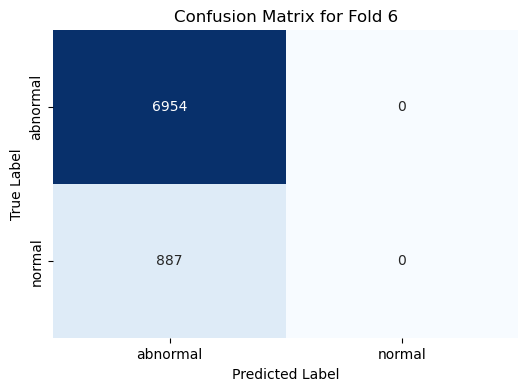

Fold 7
Accuracy for fold 7: 88.88%
F1 Score for fold 7: 0.8365
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6969
      normal       0.00      0.00      0.00       872

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


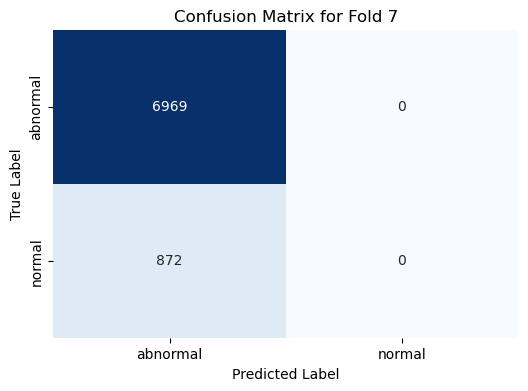

Fold 8
Accuracy for fold 8: 89.17%
F1 Score for fold 8: 0.8407
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6991
      normal       0.00      0.00      0.00       849

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


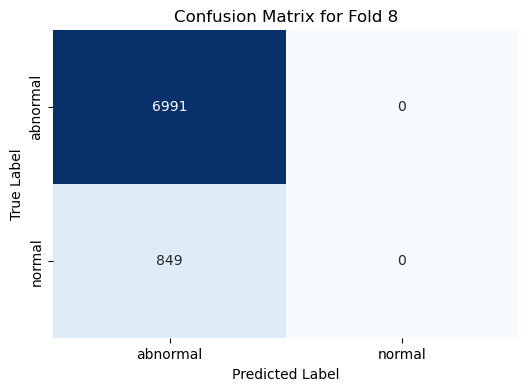

Fold 9
Accuracy for fold 9: 89.20%
F1 Score for fold 9: 0.8410
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6993
      normal       0.00      0.00      0.00       847

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


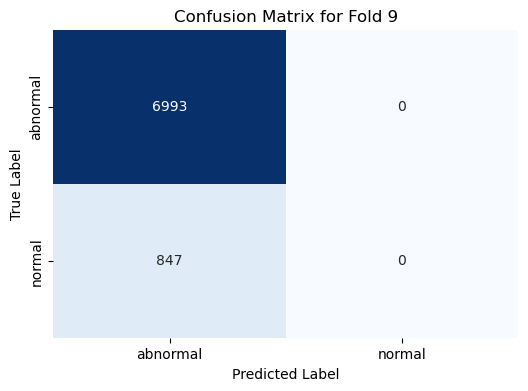

Fold 10
Accuracy for fold 10: 89.29%
F1 Score for fold 10: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7000
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


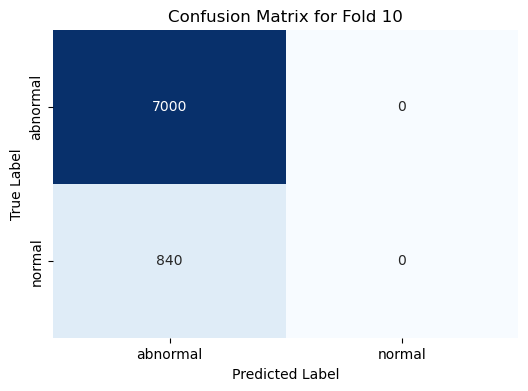

Average Accuracy: 89.01%
Average F1 Score: 0.8384


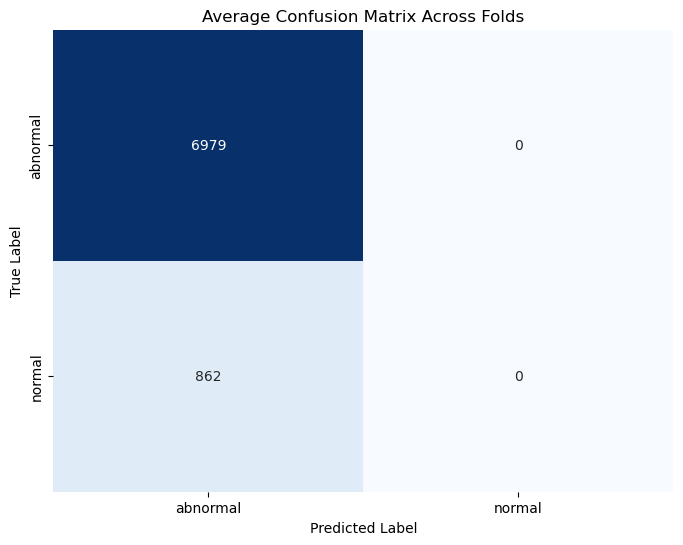

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.29%, F1 Score = 0.8423
Fold 2: Akurasi = 89.25%, F1 Score = 0.8418
Fold 3: Akurasi = 88.67%, F1 Score = 0.8335
Fold 4: Akurasi = 89.08%, F1 Score = 0.8394
Fold 5: Akurasi = 88.61%, F1 Score = 0.8326
Fold 6: Akurasi = 88.69%, F1 Score = 0.8337
Fold 7: Akurasi = 88.88%, F1 Score = 0.8365
Fold 8: Akurasi = 89.17%, F1 Score = 0.8407
Fold 9: Akurasi = 89.20%, F1 Score = 0.8410
Fold 10: Akurasi = 89.29%, F1 Score = 0.8423


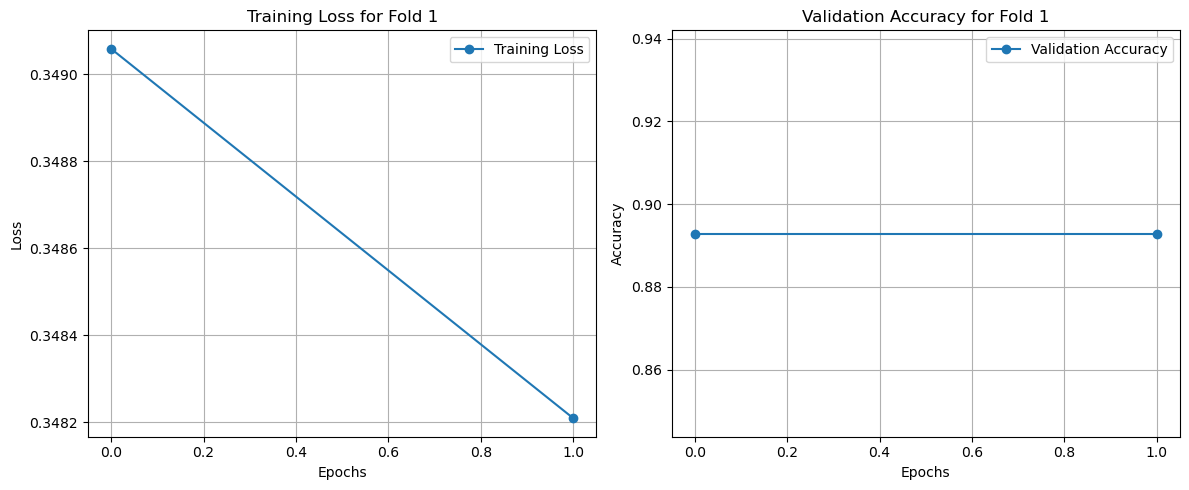

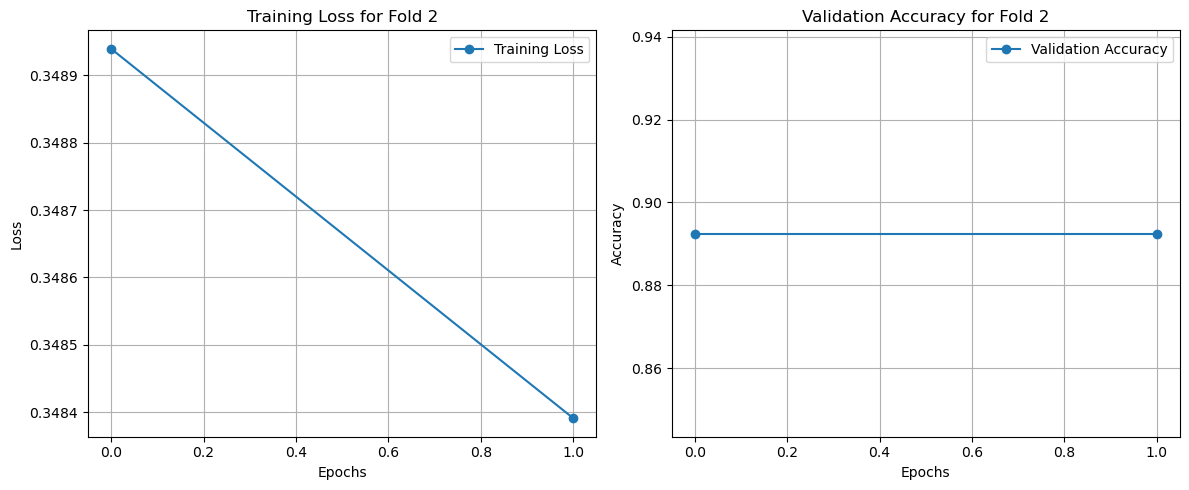

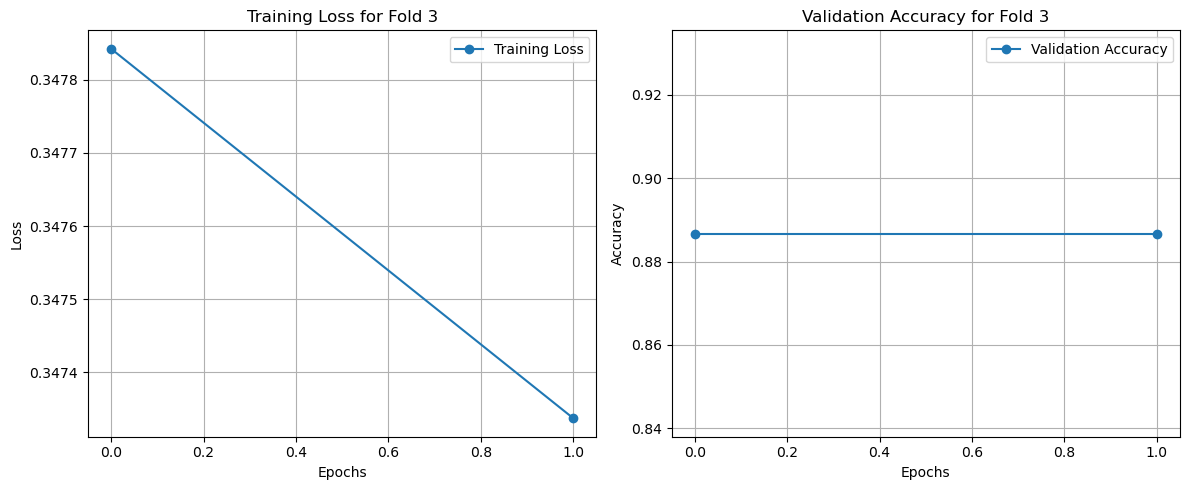

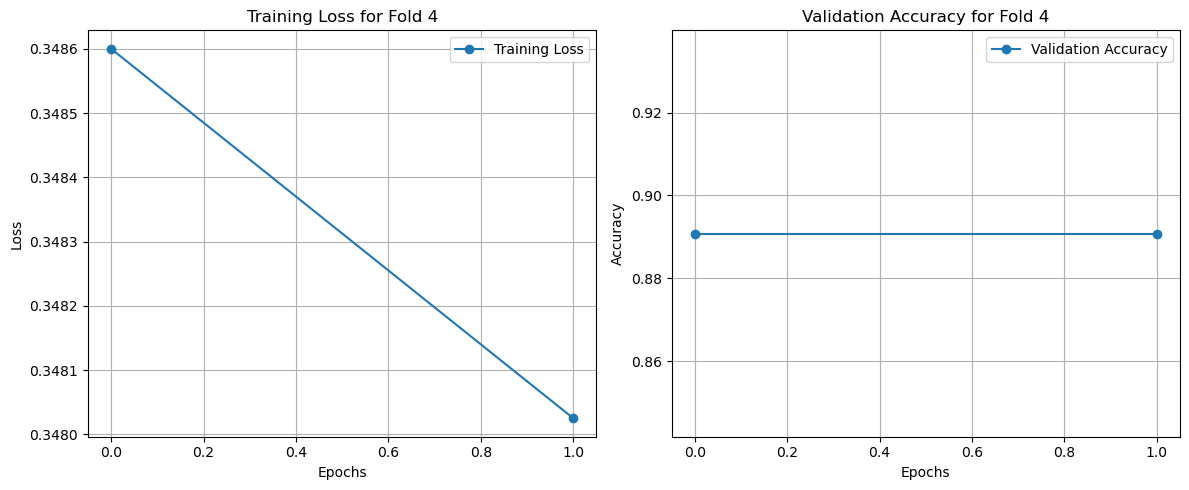

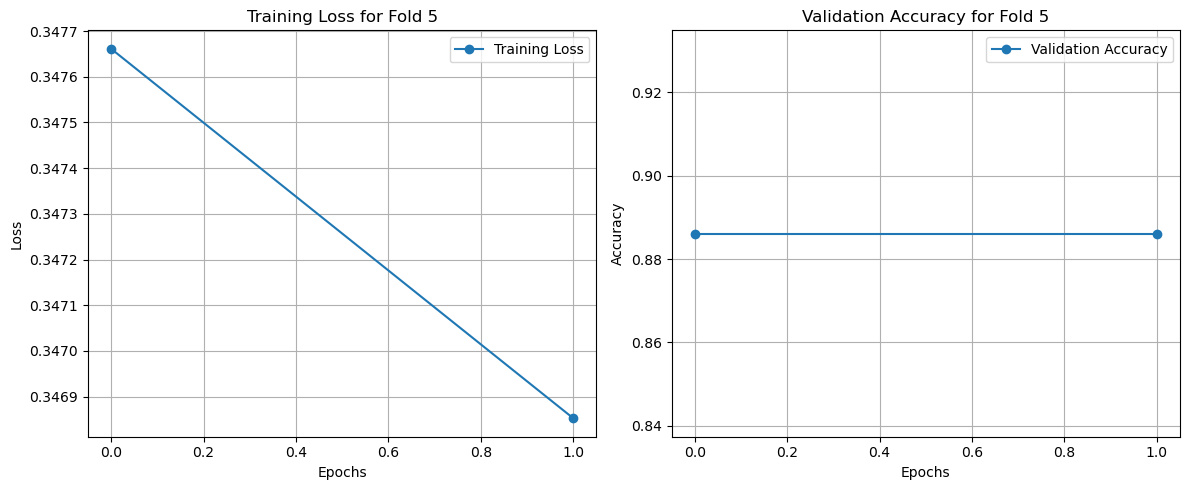

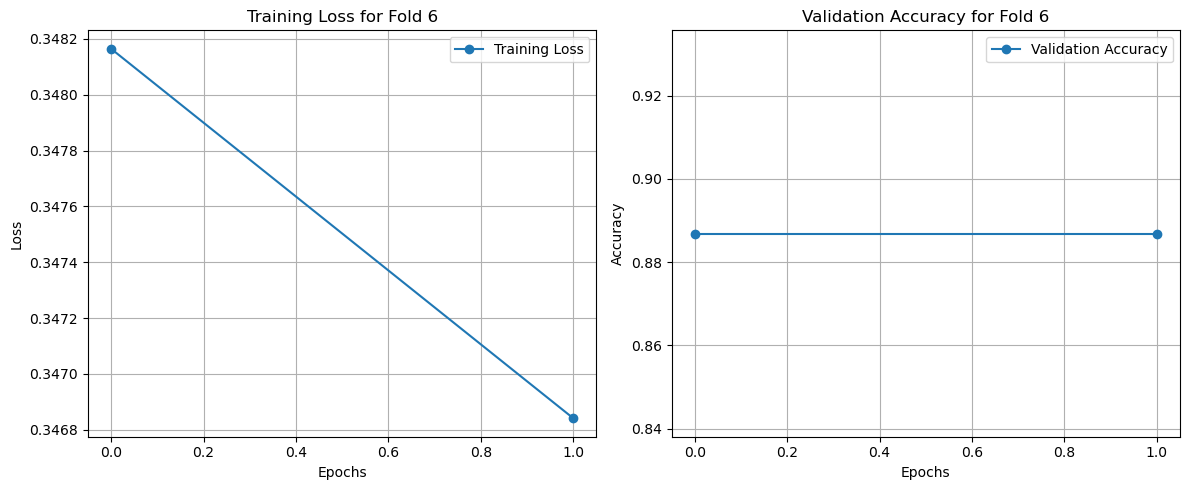

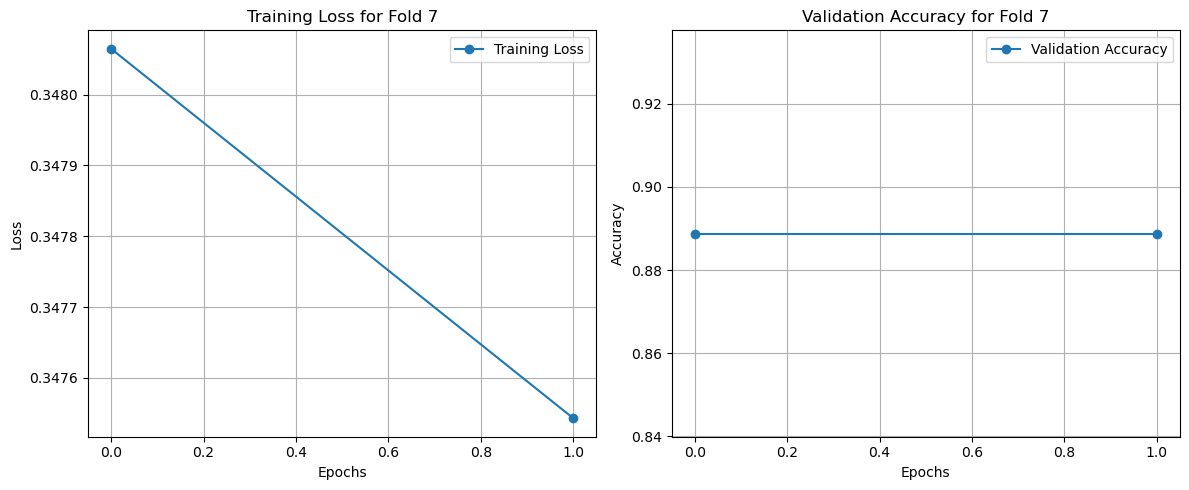

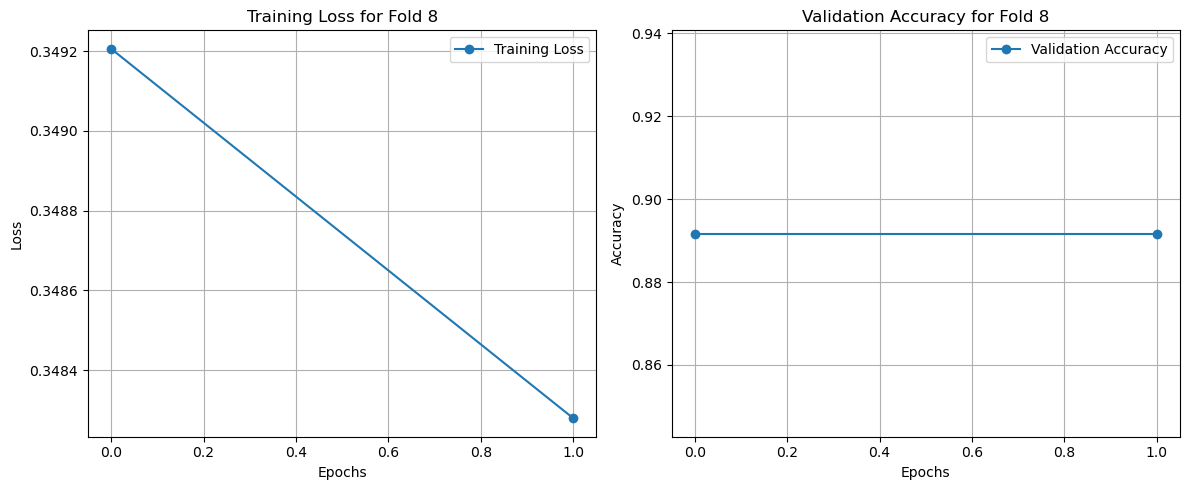

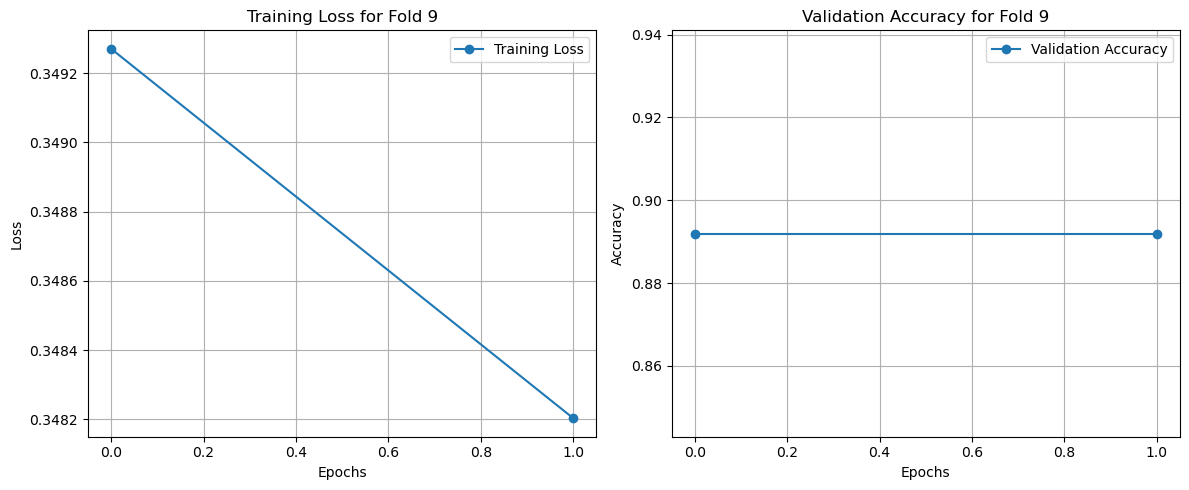

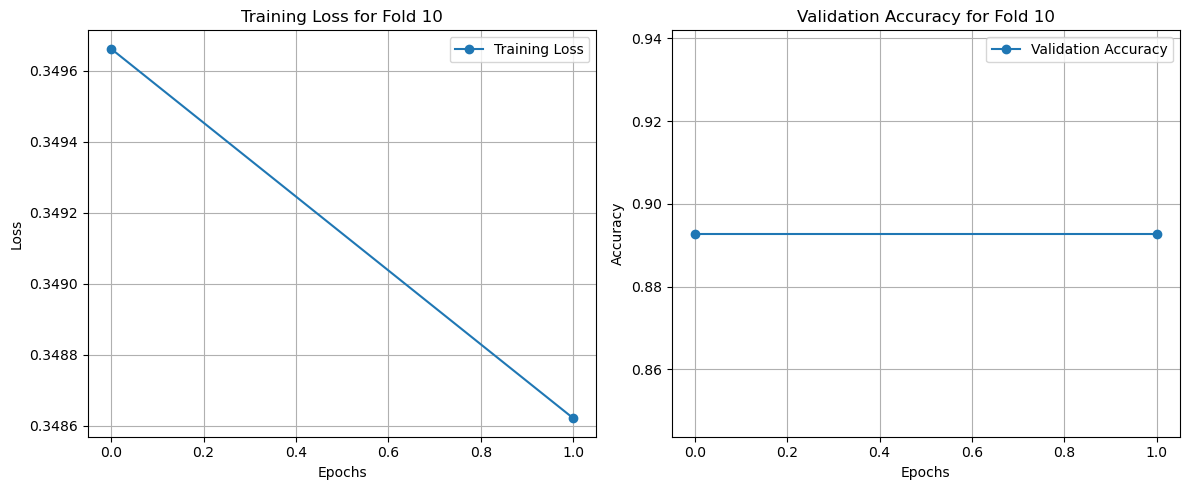

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = lb.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

print(f'Classification with best parameter: {best_params}')

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names), nhead=best_params["nhead"])
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=best_params["lr"])

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)

# 2. Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenisasi Data
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

# Tokenisasi data
X_bin_tokenized = tokenize_data(X_bin.astype(str).agg(' '.join, axis=1))  # Gabungkan fitur jika perlu
y_bin_encoded = le1.transform(y_bin)

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

# Lists to store average losses and accuracies for plotting
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin_tokenized['input_ids'][train_index], X_bin_tokenized['input_ids'][val_index]
    y_train, y_val = y_bin_encoded[train_index], y_bin_encoded[val_index]

    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Move model to GPU if available
    if torch.cuda.is_available():
        model.cuda()

    # Train the model
    num_epochs = 3
    train_losses = []  # List to store loss for each epoch
    val_accuracies = []  # List to store validation accuracy for each epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val['input_ids'].cuda()) if torch.cuda.is_available() else model(X_val['input_ids'])
            _, y_pred = torch.max(y_pred_probs.logits, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        val_accuracies.append(accuracy)

    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.cpu().numpy(), target_names=class_names)
    print(cls_report)

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plotting the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install optuna


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_
bin_data.fillna(0, inplace=True)

# 2. Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenisasi Data
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

# Tokenisasi data
X_bin_tokenized = tokenize_data(X_bin.astype(str).agg(' '.join, axis=1))
y_bin_encoded = le1.transform(y_bin)

# 4. Fungsi untuk Melatih Model
def train_model(trial):
    # Hyperparameters
    num_epochs = trial.suggest_int("num_epochs", 2, 5)
    batch_size = trial.suggest_int("batch_size", 8, 32)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)

    # KFold Cross-Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    all_accuracy, all_f1_scores = [], []

    for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
        print(f'Fold {fold + 1}')

        # Split data
        X_train, X_val = X_bin_tokenized['input_ids'][train_index], X_bin_tokenized['input_ids'][val_index]
        y_train, y_val = y_bin_encoded[train_index], y_bin_encoded[val_index]

        # Create DataLoader
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Initialize the model
        model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))
        optimizer = AdamW(model.parameters(), lr=learning_rate)

        # Move model to GPU if available
        if torch.cuda.is_available():
            model.cuda()

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0
            for inputs, labels in train_loader:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()

                optimizer.zero_grad()
                outputs = model(inputs, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val['input_ids'].cuda()) if torch.cuda.is_available() else model(X_val['input_ids'])
            _, y_pred = torch.max(y_pred_probs.logits, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        all_accuracy.append(accuracy)

    # Return the average accuracy across all folds
    return np.mean(all_accuracy)

# 5. Hyperparameter Tuning dengan Optuna
study = optuna.create_study(direction='maximize')
study.optimize(train_model, n_trials=20)

# 6. Menampilkan Hasil
print("Best Trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 7. Visualisasi Hasil
optuna.visualization.plot_optimization_history(study)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
data = pd.read_csv('./Android_Ransomeware.csv')

# Ganti label menjadi dua kategori 'normal' dan 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 'Benign' else 'abnormal'))
bin_data = data.copy()
bin_data['label'] = bin_label

# Label encoding (0,1) untuk label biner
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

# 2. Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# 3. Membagi dataset
X_bin = bin_data.drop(columns=['label'], axis=1)
y_bin = bin_data['label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# 4. Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 5. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = GPTModel(input_dim=X_train_tensor.shape[1], num_classes=len(le1.classes_))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=le1.classes_, yticklabels=le1.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 6. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 7. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=le1.classes_, yticklabels=le1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 8. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 9. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Preprocessing data
data = pd.read_csv('/content/gdrive/MyDrive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/dataset/UNSW_NB15_training-set.csv')

# Ganti label menjadi dua kategori 'normal' dan 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))
bin_data = data.copy()
bin_data['label'] = bin_label

# Label encoding (0,1) untuk label biner
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

# Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# Memisahkan dataset
X_bin = bin_data.drop(columns=['label'], axis=1)
y_bin = bin_data['label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# Hyperparameter tuning function
def objective(trial):
    d_model = trial.suggest_int('d_model', 32, 128)  # Dimensionality of the model
    nhead = trial.suggest_int('nhead', 1, 4)  # Number of attention heads
    num_layers = trial.suggest_int('num_layers', 1, 4)  # Number of layers
    learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate

    # Initialize the model
    model = GPTModel(input_dim=X_train_bin.shape[1], num_classes=len(le1.classes_), d_model=d_model, nhead=nhead, num_layers=num_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=50)
    accuracies = []

    for train_index, val_index in kf.split(X_train_bin):
        X_train, X_val = X_train_bin.iloc[train_index], X_train_bin.iloc[val_index]
        y_train, y_val = y_train_bin.iloc[train_index], y_train_bin.iloc[val_index]

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train.values)
        y_train_tensor = torch.LongTensor(y_train.values)
        X_val_tensor = torch.FloatTensor(X_val.values)
        y_val_tensor = torch.LongTensor(y_val.values)

        # Create DataLoader
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

        # Train the model
        num_epochs = 10  # Sesuaikan dengan kebutuhan
        for epoch in range(num_epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)
            accuracy = accuracy_score(y_val, y_pred.numpy())
            accuracies.append(accuracy)

    return np.mean(accuracies)  # Kembalikan rata-rata akurasi dari setiap fold

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Sesuaikan jumlah percobaan sesuai kebutuhan

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
data = pd.read_csv('/content/gdrive/MyDrive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/dataset/UNSW_NB15_training-set.csv')

# Ganti label menjadi dua kategori 'normal' dan 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))
bin_data = data.copy()
bin_data['label'] = bin_label

# Label encoding (0,1) untuk label biner
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

# 2. Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# 3. Membagi dataset
X_bin = bin_data.drop(columns=['label'], axis=1)
y_bin = bin_data['label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# 4. Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 5. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = GPTModel(input_dim=X_train_tensor.shape[1], num_classes=len(le1.classes_))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=le1.classes_, yticklabels=le1.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 6. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 7. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=le1.classes_, yticklabels=le1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 8. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 9. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
